In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
gamma0 = 7/5
rho0 = 1e-5
P0 = 3.848e3
U0 = 0
gamma3 = 5/3
C3 = 1.31478e4
P3 = 1.17928e9
U3 = 5e4

In [7]:
rho3 = gamma3 * P3 / (C3**2)

alpha0 = (gamma0 + 1)/(gamma0 - 1)
n = 2*gamma3 / (gamma3 - 1)
mu = (U3 - U0) * math.sqrt((gamma0 - 1)*rho0 / (2 * P0))
v = (2 / (gamma3 - 1)) * math.sqrt( gamma3 * (gamma0 - 1) * P3 * rho0 / (2 * P0 * rho3) )
# v = (2 * C3 / (gamma3 - 1)) * math.sqrt((gamma0 - 1) * rho0 / (2 * P0))
X = P3 / P0

In [8]:
c = []
c.append(X**2)
c.append(-alpha0 * (v**2) * X)
c.append(2 * alpha0 * v * (mu + v) * X)
c.append(-(2 + alpha0 * ((mu + v)**2)) * X)
c.append(-v**2)
c.append(2 * v * (mu + v))
c.append( -(mu + v)**2 + 1)

c = np.array(c)
print('coefficients: ', *c)
print('')
print('num of roots: ', (c > 0).sum())

coefficients:  93921223110.20439 -1486882.8086590618 6743427.483838409 -8258761.643467001 -0.8086184010187105 3.6673095671101854 -3.1580674654677736

num of roots:  3


In [9]:
f = lambda z: (c[0] * math.pow(z, 2 * n)) + (c[1] * math.pow(z, n + 2)) + (c[2] * math.pow(z, n + 1)) + (c[3] * math.pow(z, n)) + (c[4] * math.pow(z, 2)) + (c[5] * z) + c[6]

In [10]:
A = max([abs(x) for x in c[1:]])
B = max([abs(x) for x in c[:-1]])
a = abs(c[-1]) / (abs(c[-1]) + B)
b = 1 + (A / abs(c[0]))

In [11]:
a, b

(3.362464159624499e-11, 1.0000879328587298)

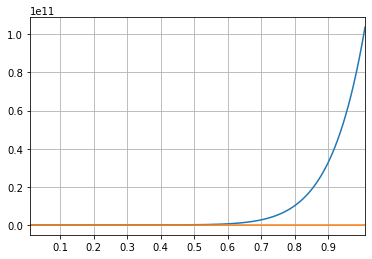

In [12]:
points = np.linspace(0.01, 1.01, 1000)
plt.plot(points, [f(p) for p in points])
plt.plot(points, np.zeros(len(points)))
ax = plt.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
plt.xlim([0.01, 1.01])
plt.grid()

In [13]:
# print(a)

# print(z1, z2)

N = 1000
h = (b - a) / N

loc = []
for x in np.arange(a, b, h):
    if f(x) * f(x + h) < 0:
        loc.append(x)

# print('h: ', h)
print('roots localized:')
for x in loc:
    print('(', x, ', ', x + h, ')', sep='')

roots localized:
(0.1500131899573904, 0.1510132778902155)


In [14]:
def find_root(x1, x2):
    if abs(x1 - x2) < 1e-8:
        return x1

    if f(x1) * f((x1 + x2) / 2) < 0:
        return find_root(x1, (x1 + x2) / 2)
    if f((x1 + x2) / 2) * f(x2) < 0:
        return find_root((x1 + x2) / 2, x2)

    return (x1 + x2) / 2

In [15]:
roots = [find_root(x, x + h) for x in loc]

print('roots: ', roots)

C0 = math.sqrt(gamma0 * P0 / rho0)
# P1 = [P3 * math.pow(x, n) for x in roots]

roots:  [0.15073975530556039]


In [16]:
for x in roots:
    P1 = P3 * math.pow(x, n)
    P2 = P1

    C2 = C3 * math.pow(P2 / P3, (gamma3 - 1) / (2 * gamma3))

    U2 = U3 + (2 / (gamma3 - 1)) * (C3 - C2)
    U1 = U2

    rho1 = rho0 * ( (gamma0 - 1) + ((gamma0 + 1) * P1 / P0) ) / ( (gamma0 + 1) + ((gamma0 - 1) * P1 / P0) )

    D0 = ((rho1 * U1) - (rho0 * U0)) / (rho1 - rho0)

    print('')
    print('D0:     ', D0)

    a = math.sqrt((P1 - P0) / (rho1 - rho0))
    l1 = (U1 - D0) / a
    l0 = (U0 - D0) / a
    # print('l1, l2: ', l1, l2)
    print('l1, l0: ', l1, l0)
    print('l1  l0: ', l1 * l0)


D0:      105312.68759662306
l1, l0:  -0.4551316664826729 -2.1971667020628325
l1  l0:  1.0000001426500953
